Colab Link: https://colab.research.google.com/drive/10kKCr6cRvFVMWI89cGGLmp98KdvJM1_G

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

### Regular TimeSeries Data

In [7]:
df_ts_base1 = pd.read_csv('data/TimeSeriesData1.csv')
df_ts_base1.date = pd.to_datetime(df_ts_base1.date, dayfirst = True)
df_ts_base1.set_index("date", inplace=True)
df_ts_base1 = df_ts_base1.asfreq("b")
df_ts_base1=df_ts_base1.ffill()

# Keep only one column and rename
df_ts_base1.drop(['dax', 'ftse', 'nikkei'], axis = 1, inplace=True)
df_ts_base1.columns = ['market_value']

In [8]:
df_ts_base1.head(2)

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27


### White Noise

In [10]:
wn = np.random.normal(loc = df_ts_base1.market_value.mean(), scale = df_ts_base1.market_value.std(), size = len(df_ts_base1))

In [11]:
df_ts_base1['wn'] = wn

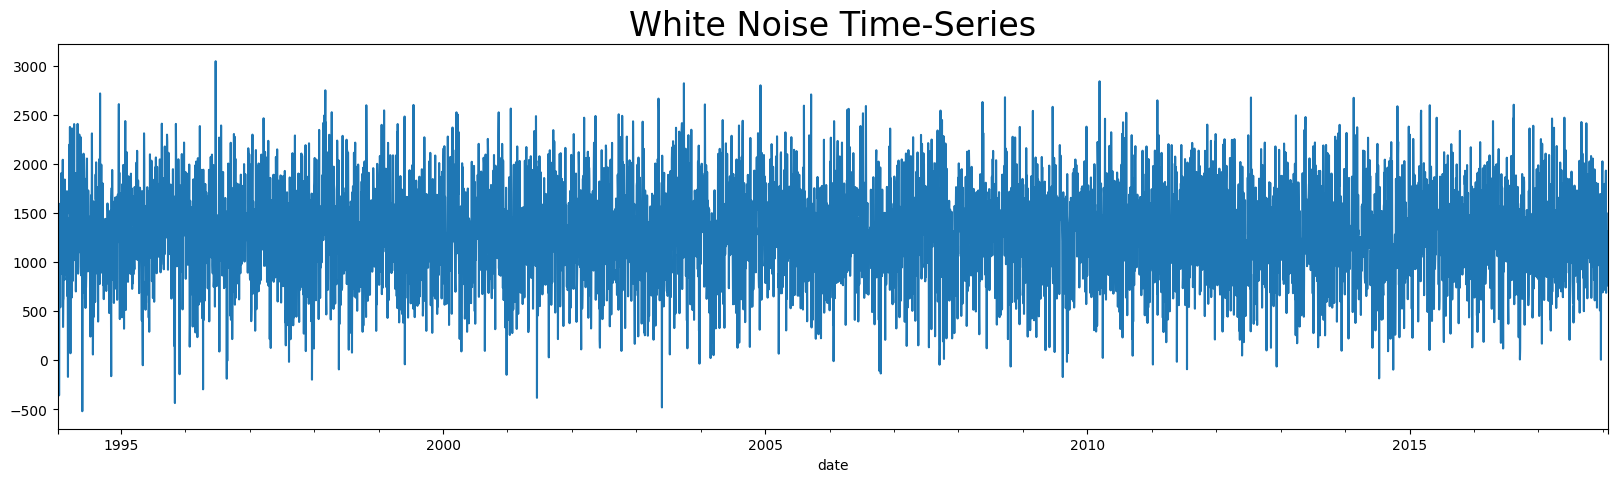

In [12]:
df_ts_base1.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

### Random Walk

In [13]:
rw = pd.read_csv("./data/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [14]:
df_ts_base1['rw'] = rw.price

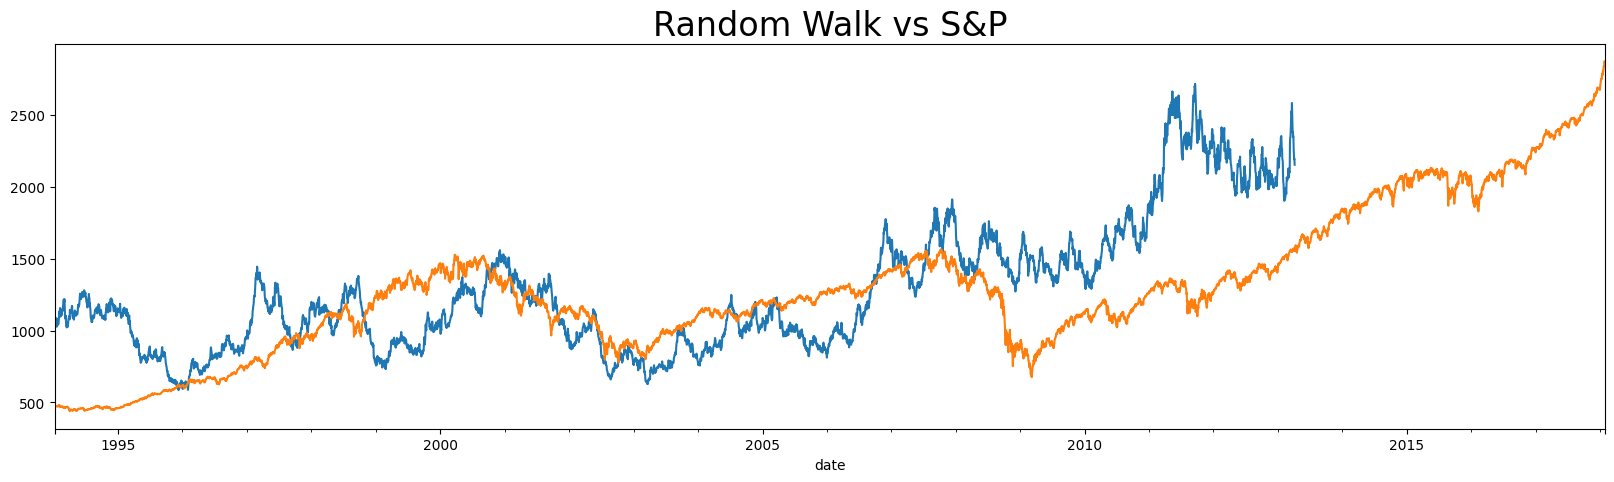

In [15]:
df_ts_base1.rw.plot(figsize = (20,5))
df_ts_base1.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()